In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import datasets, svm 
from sklearn.model_selection import train_test_split 
from __future__ import division, print_function
%matplotlib inline

In [ ]:
#Importing dataset and preprocessing:
dataframe = pd.read_csv('Hawks.csv') 
print(dataframe)

     Unnamed: 0  Month  Day  Year CaptureTime ReleaseTime  BandNumber Species  \
0             1      9   19  1992       13:30         NaN   877-76317      RT   
1             2      9   22  1992       10:30               877-76318      RT   
2             3      9   23  1992       12:45               877-76319      RT   
3             4      9   23  1992       10:50               745-49508      CH   
4             5      9   27  1992       11:15              1253-98801      SS   
..          ...    ...  ...   ...         ...         ...         ...     ...   
903         904     11   18  2003       14:44              1177-04777      RT   
904         905     11   19  2003       10:18               803-05985      SS   
905         906     11   19  2003       12:02              1807-53145      RT   
906         907     11   20  2003        9:56              1177-04778      RT   
907         908     11   20  2003       13:30              1207-53145      RT   

    Age  Sex   Wing  Weight

In [ ]:
columns = ['Species','Wing', 'Weight','Tail']
dataframe = dataframe[columns]
print(dataframe)

    Species   Wing  Weight  Tail
0        RT  385.0   920.0   219
1        RT  376.0   930.0   221
2        RT  381.0   990.0   235
3        CH  265.0   470.0   220
4        SS  205.0   170.0   157
..      ...    ...     ...   ...
903      RT  380.0  1525.0   224
904      SS  190.0   175.0   150
905      RT  360.0   790.0   211
906      RT  369.0   860.0   207
907      RT  199.0  1290.0   222

[908 rows x 4 columns]


In [ ]:
#Checking for dublicate values: 
dups= dataframe.duplicated()
# report if there are any duplicates
print(dups.any()) # list all duplicate rows 
print(dataframe [dups])      #wrangling

True
    Species   Wing  Weight  Tail
332      RT  368.0  1244.0   220
430      SS  202.0   180.0   160


In [ ]:
#Deleting the dublicate values: 
dataframe.drop_duplicates (inplace=True)

<ipython-input-40-173570eb4dfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.drop_duplicates (inplace=True)


In [ ]:
#Checking for null values if any: 
print(dataframe.isnull().sum())

Species     0
Wing        1
Weight     10
Tail        0
dtype: int64


In [ ]:
#Deleting the rows that has null values: 
df= dataframe.dropna()

In [ ]:
print(df)
print(df.isnull().sum())

    Species   Wing  Weight  Tail
0        RT  385.0   920.0   219
1        RT  376.0   930.0   221
2        RT  381.0   990.0   235
3        CH  265.0   470.0   220
4        SS  205.0   170.0   157
..      ...    ...     ...   ...
903      RT  380.0  1525.0   224
904      SS  190.0   175.0   150
905      RT  360.0   790.0   211
906      RT  369.0   860.0   207
907      RT  199.0  1290.0   222

[895 rows x 4 columns]
Species    0
Wing       0
Weight     0
Tail       0
dtype: int64


In [ ]:
#Creating Training and Testing sets for Evaluation:
x = df.iloc[:, [1,3]].values
y_code= df.iloc[:, 0].values
y = []
for i in y_code:
  if i=='RT':
    y.append(0)
  elif i == 'ss':
    y.append(1)
  else:
    y.append(2)
#df[ 'Species'].unique()
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state= 25)

In [ ]:
x_reg = df.iloc[:, [1]].values 
y_reg = np.reshape(y, (-1, 1))
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size = 0.2, random_state = 25)

In [ ]:
from sklearn.preprocessing import StandardScaler
Stds_x = StandardScaler()
Stds_y= StandardScaler()
x_1 = Stds_x.fit_transform(x_reg)
y_p = Stds_y.fit_transform(y_reg)

In [ ]:
from sklearn.svm import SVR
regressor_linear = SVR(kernel= 'linear')
regressor_linear.fit(x_train_reg, y_train_reg)
print("Kernel = linear") 
print("Accuracy obtained :", regressor_linear.score(x_test_reg, y_test_reg), "\n")

regressor_poly= SVR(kernel ='poly')
regressor_poly.fit(x_train_reg, y_train_reg)
print("Kernel Poly")
print("Accuracy obtained", regressor_poly.score(x_test_reg, y_test_reg), "\n")

regressor_rbf= SVR(kernel ='rbf')
regressor_rbf.fit(x_train_reg, y_train_reg)
print("Kernel rbf")
print("Accuracy obtained :", regressor_rbf.score (x_test_reg, y_test_reg), "\n")

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Kernel = linear
Accuracy obtained : 0.9058027039277663 



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Kernel Poly
Accuracy obtained 0.8717935100777878 

Kernel rbf
Accuracy obtained : 0.9233656075574972 



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(regressor_linear.support_vectors_)

[[202. ]
 [196. ]
 [194. ]
 [412. ]
 [405. ]
 [410. ]
 [366. ]
 [209. ]
 [205. ]
 [366. ]
 [375. ]
 [435. ]
 [377. ]
 [171. ]
 [194. ]
 [213. ]
 [199. ]
 [369. ]
 [208. ]
 [409. ]
 [372. ]
 [253. ]
 [345. ]
 [400. ]
 [372. ]
 [355. ]
 [170. ]
 [362. ]
 [377. ]
 [361. ]
 [204. ]
 [163. ]
 [480. ]
 [410. ]
 [360. ]
 [160. ]
 [450. ]
 [408. ]
 [202. ]
 [354. ]
 [373. ]
 [400. ]
 [160. ]
 [369. ]
 [416. ]
 [414. ]
 [161. ]
 [374. ]
 [378. ]
 [200. ]
 [260. ]
 [223. ]
 [400. ]
 [197. ]
 [200. ]
 [368. ]
 [370. ]
 [405. ]
 [204. ]
 [405. ]
 [370. ]
 [235. ]
 [355. ]
 [196. ]
 [209. ]
 [401. ]
 [243. ]
 [410. ]
 [159. ]
 [404. ]
 [197. ]
 [172. ]
 [164. ]
 [167. ]
 [406. ]
 [167. ]
 [161. ]
 [195. ]
 [375. ]
 [371. ]
 [412. ]
 [372. ]
 [376. ]
 [373. ]
 [369. ]
 [358. ]
 [161. ]
 [203. ]
 [403. ]
 [370. ]
 [205. ]
 [417. ]
 [193. ]
 [200. ]
 [365. ]
 [407. ]
 [171. ]
 [158. ]
 [369. ]
 [375. ]
 [258. ]
 [410. ]
 [413. ]
 [362. ]
 [377. ]
 [230. ]
 [377. ]
 [203. ]
 [400. ]
 [252. ]
 [359. ]
 

In [ ]:
len(regressor_linear.support_vectors_)

516

In [ ]:
len(regressor_poly.support_vectors_)

443

In [ ]:
print(regressor_rbf.support_vectors_)

[[377. ]
 [345. ]
 [480. ]
 [313. ]
 [272. ]
 [349. ]
 [262. ]
 [277. ]
 [143. ]
 [111. ]
 [343. ]
 [320. ]
 [155. ]
 [ 37.2]
 [370. ]
 [225. ]
 [350. ]
 [265. ]
 [336. ]
 [271. ]
 [225. ]
 [268. ]
 [156. ]
 [266. ]
 [241. ]
 [227. ]
 [350. ]
 [469. ]
 [268. ]
 [347. ]
 [381. ]
 [265. ]
 [233. ]]


In [ ]:
len(regressor_rbf.support_vectors_)

33

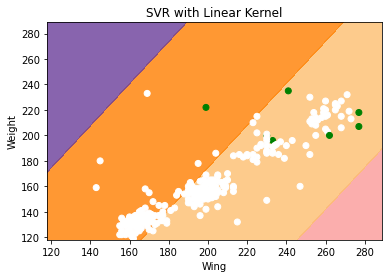

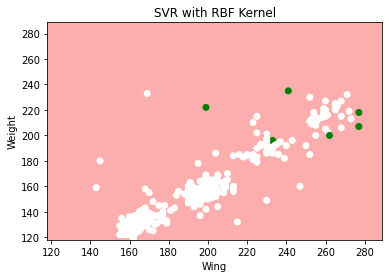

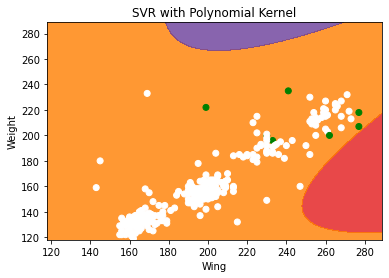

In [ ]:
#visualization of various kernels:
from sklearn.svm import SVR
regressor_linear = SVR (kernel ='linear').fit(x_train, y_train) 
regressor_rbf= SVR(kernel ='rbf', gamma= 0.7).fit(x_train, y_train) 
regressor_poly= SVR(kernel= 'poly', degree= 3).fit(x_train, y_train)
#creating a mesh plot:
h = 0.2;
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy= np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ['SVR with Linear Kernel', 'SVR with RBF Kernel', 'SVR with Polynomial Kernel']
for i, clf in enumerate((regressor_linear, regressor_rbf,regressor_poly)):
  plt.figure(i)
  z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  z = z.reshape(xx.shape)
  plt.contourf(xx, yy, z, cmap= plt.cm.Paired, alpha=0.8)
  
  plt.scatter(x[:,0], x[:, 1], c=y, cmap = plt.cm.ocean)
  plt.xlabel('Wing')
  plt.ylabel('Weight')
  plt.xlim(xx.min(), xx.max()) 
  plt.xlim(yy.min(), yy.max())
  #plt.xticks(())
  #plt.yticks(())
  plt.title(titles[i])
plt.show()